# Let's start on the basics. Variables and arrays

### First, import some libraries

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
N=10
array_1 = np.arange(N) # Create an array of N values
array_2 = np.random.randint(low=0,high=10,size=N) # Create an array of random int values
            # with the same lenght as array_1

print(array_1,array_2) # print both array_1 and array_2
print(array_1.shape, array_2.shape) # print both array_1 and array_2 shapes
_ # print summation of array_1 and array_2

[0 1 2 3 4 5 6 7 8 9] [1 9 6 5 8 6 5 0 1 3]
(10,) (10,)


''

In [ ]:
array_1[2]=70 # Replace the value of array_1 in pos 3 by 70
print(array_1)

print(np.sum(array_1)) # Print summation again

[ 0  1 70  3  4  5  6  7  8  9]
113


In [ ]:
result_array = array_1*array_2 # Apply element-wise multiplication among array_1 and array_2
print("Result element-wise multiplication: ",result_array) # Print results

Result element-wise multiplication:  [  0   9 420  15  32  30  30   0   8  27]


# Playing with some images! Introduction to OpenCV

Download the image [lena.jpg](https://drive.google.com/file/d/1gH5sJN__2g7f9ndLhLvTECdOBJIGUbg_/view) before getting started!


### First, let's mount Google drive

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import some libraries

In [17]:
# Import some libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load an image using OpenCV

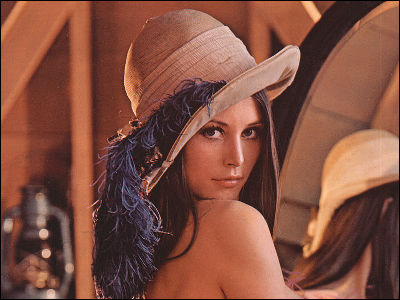

In [18]:
# Loading a color image
img = cv2.imread('/content/drive/MyDrive/clase2machine/lena.jpg',1 )

#plt.imshow(img) # plots an image
from google.colab.patches import cv2_imshow
cv2_imshow(img)

### Let's play with the data

In [19]:
# Printing the image shape (size of the image)
img.shape

(300, 400, 3)

In [ ]:
# Looking through the image...
pixel_value = img[100,150]
print("Pixel value at [100,150]:",pixel_value)
# print among image indexes
# You can also iterate over a range of pixel values
# Example: Print pixel values from row 100 to 105 and column 150 to 155
for row in range(100,105):
  for col in range(150,155):
    print(f"Pixel value ar [{row},{col}]:{img[row,col]}")


Pixel value at [100,150]: [ 63  79 145]
Pixel value ar [100,150]:[ 63  79 145]
Pixel value ar [100,151]:[ 62  79 146]
Pixel value ar [100,152]:[ 62  67 128]
Pixel value ar [100,153]:[ 66  69 130]
Pixel value ar [100,154]:[ 98  99 159]
Pixel value ar [101,150]:[ 60  76 143]
Pixel value ar [101,151]:[ 63  79 148]
Pixel value ar [101,152]:[ 61  66 127]
Pixel value ar [101,153]:[ 69  74 135]
Pixel value ar [101,154]:[ 51  56 117]
Pixel value ar [102,150]:[ 50  67 134]
Pixel value ar [102,151]:[ 48  66 137]
Pixel value ar [102,152]:[ 55  65 125]
Pixel value ar [102,153]:[ 36  45 108]
Pixel value ar [102,154]:[ 51  60 123]
Pixel value ar [103,150]:[ 47  63 132]
Pixel value ar [103,151]:[ 39  57 128]
Pixel value ar [103,152]:[ 59  70 130]
Pixel value ar [103,153]:[ 54  65 127]
Pixel value ar [103,154]:[ 59  71 135]
Pixel value ar [104,150]:[ 52  60 120]
Pixel value ar [104,151]:[ 39  47 107]
Pixel value ar [104,152]:[ 54  69 141]
Pixel value ar [104,153]:[ 57  76 151]
Pixel value ar [104,154]

In [20]:
indexes = [(50, 50), (100, 150), (200, 250)]

for (row, col) in indexes:
    pixel_value = img[row, col]
    print(f"Pixel value at [{row}, {col}]: {pixel_value}")

Pixel value at [50, 50]: [30 36 79]
Pixel value at [100, 150]: [ 63  79 145]
Pixel value at [200, 250]: [29 31 49]


### Load an image in grayscale

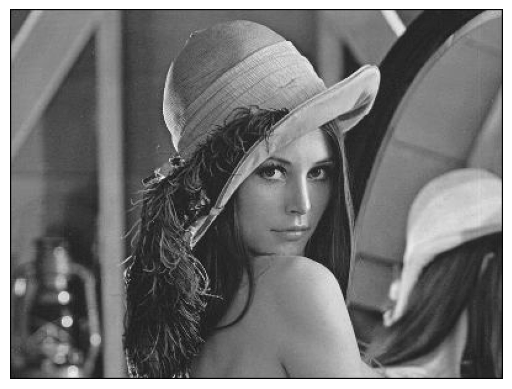

In [21]:
# Loading a color image in grayscale

img_gray = cv2.imread('/content/drive/MyDrive/clase2machine/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Muestra la imagen en escala de grises
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

### Play with the image


In [22]:
# Printing the image shape
# Imprime la forma o tamaño de la imagen
print("Forma de la imagen:", img_gray.shape)

Forma de la imagen: (300, 400)


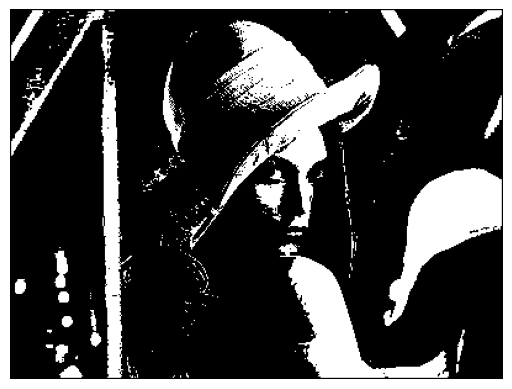

In [23]:
_, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Muestra la imagen binarizada
plt.imshow(img_binary, cmap='gray')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()


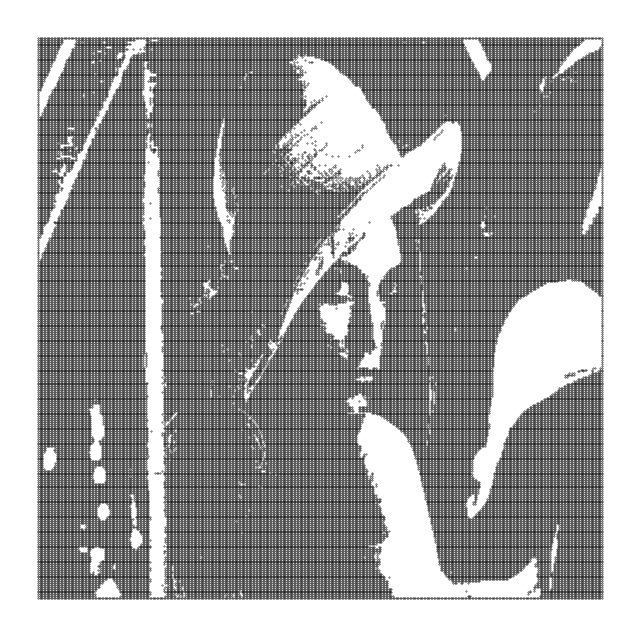

In [24]:

# Obtén las coordenadas de los puntos donde los píxeles son diferentes de 0 (o de un cierto valor)
coords = np.column_stack(np.where(img_gray < 128))  # Usar un umbral si es necesario

# Configura el gráfico de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(coords[:, 1], img_gray.shape[0] - coords[:, 0], s=0.1, color='black')  # Invertir eje Y aquí
plt.axis('off')  # Ocultar los ejes

plt.show()


### Going further

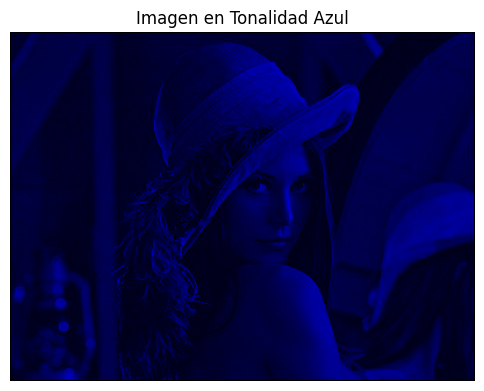

In [25]:
img_blue = np.zeros_like(img)  # Crea una imagen vacía del mismo tamaño que la original
img_blue[..., 0] = img[..., 0]  # Copia el canal azul de la imagen original

# Muestra la imagen con tonalidad azul
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB))  # Convertir a RGB para mostrar correctamente
plt.axis('off')  # Opcional: para ocultar los ejes
plt.title('Imagen en Tonalidad Azul')
plt.show()

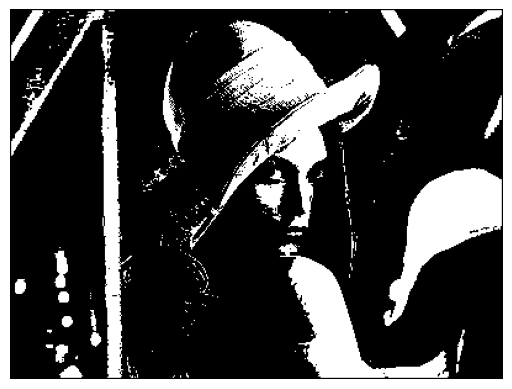

In [26]:
# Itera sobre las filas y columnas de la imagen
for r in range(img_gray.shape[0]):  # Recorre las filas
    for c in range(img_gray.shape[1]):  # Recorre las columnas
        if img_gray[r, c] < 128:  # Condición: si el valor del píxel es menor a 128
            img_gray[r, c] = 0  # Asigna el valor 0 (negro)
        else:
            img_gray[r, c] = 255  # De lo contrario, asigna el valor 255 (blanco)

# Muestra la imagen modificada
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

### Save an image using OpenCV

In [27]:
cv2.imwrite('newlena.png',img_gray)

True

### Crop the image - taking regions of interest (ROI)

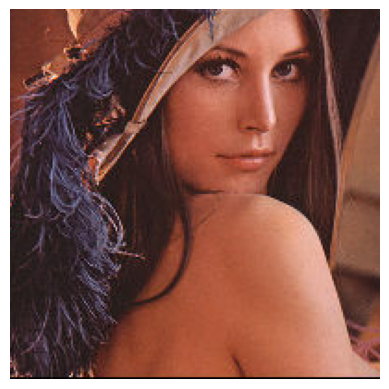

In [28]:
roi = img[100:300, 100:300]

# Muestra la ROI extraída
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))  # Si la imagen está en BGR, conviértela a RGB
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

In [29]:
img_gray[ _ , _ ] = roi
plt.imshow(img_gray, _ )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Load an image using pillow (PIL)

In [10]:
from PIL import Image

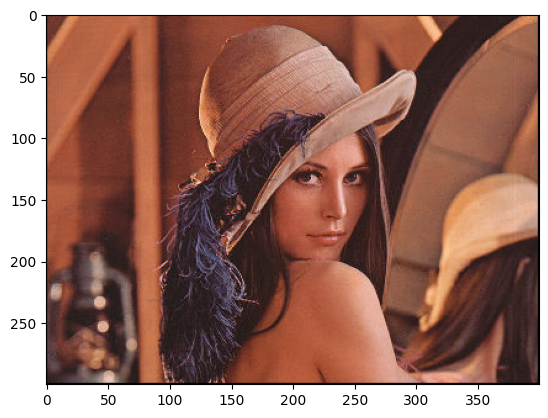

In [30]:
# Loading a color image
img = Image.open('/content/drive/MyDrive/clase2machine/lena.jpg'  )
plt.imshow(img) # plots an image

In [31]:
# Convierte la imagen a un array NumPy (aunque normalmente `cv2.imread` ya devuelve un array NumPy)
img_array = np.asarray(img)

# Imprime los primeros 10x10 píxeles de la imagen
print(img_array[:10, :10])

# Imprime la forma del array
print(img_array.shape)

[[[  0   6   7]
  [ 21  10  14]
  [ 15   0   0]
  [  7   7   0]
  [  0   2   0]
  [  8   0   0]
  [ 13   0   0]
  [  4   7   0]
  [  0   5   0]
  [  0   6   0]]

 [[ 18   8   9]
  [ 91  49  51]
  [102  48  46]
  [106  69  61]
  [ 95  64  61]
  [106  57  61]
  [109  57  59]
  [ 88  54  44]
  [115  60  63]
  [116  60  61]]

 [[ 15   0   0]
  [107  54  48]
  [122  56  44]
  [114  63  46]
  [104  55  41]
  [125  57  54]
  [131  60  54]
  [108  55  39]
  [121  57  47]
  [117  53  44]]

 [[  5   6   0]
  [104  68  54]
  [114  63  44]
  [100  63  36]
  [ 93  55  34]
  [116  58  47]
  [123  64  50]
  [106  64  40]
  [105  63  41]
  [101  60  40]]

 [[  0   2   0]
  [ 88  58  50]
  [104  55  40]
  [104  66  43]
  [103  66  47]
  [116  59  50]
  [114  56  45]
  [ 99  61  40]
  [110  50  39]
  [109  51  40]]

 [[ 11   0   5]
  [107  58  62]
  [120  53  47]
  [124  66  52]
  [127  70  59]
  [132  58  57]
  [126  52  51]
  [117  63  53]
  [116  53  46]
  [116  55  50]]

 [[ 12   0   4]
  [110  57  

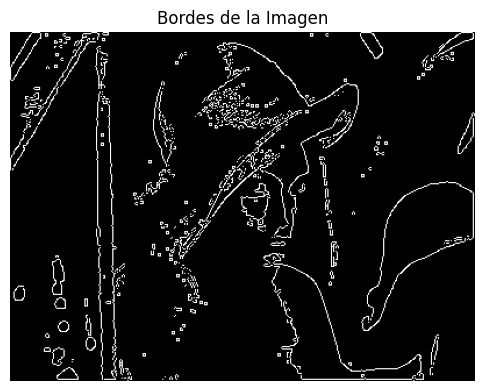

In [32]:

# Aplica el detector de bordes Canny
edges = cv2.Canny(img_gray, 100, 200)

# Muestra la imagen con solo los bordes
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Bordes de la Imagen')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

### Load the image in grayscale

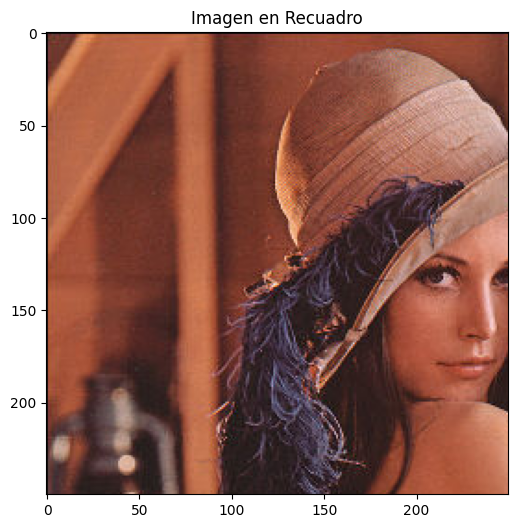

In [33]:


# Convierte la imagen a un array NumPy
img_array = np.asarray(img)

# Define el tamaño del recuadro
recuadro_size = 250  # Tamaño del recuadro (10x10 píxeles)

# Extrae una submatriz con borde alrededor
roi = img_array[:recuadro_size, :recuadro_size]

# Muestra la imagen con borde
plt.figure(figsize=(6, 6))
plt.imshow(roi, cmap='gray')
plt.title('Imagen en Recuadro')
plt.axis('on')  # Muestra los ejes
plt.show()

In [ ]:
%cd /content/drive/MyDrive/MachineLearning/machine_learning/Sem_01

In [ ]:
%ls

In [ ]:
!git status

In [ ]:
!git config --global user.email "danielaescobar597@pascualbravo.edu.co"
!git config --global user.name "Daniela50105"

In [ ]:
!ls

In [ ]:
!git add Basics.ipynb

In [ ]:
from repo_private import GIT_KEY

In [ ]:
!git commit -m "incluye modificaciones a imagen lena.jpg"